In [30]:
import pathlib

import rasterio
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [21]:
ds = rasterio.open('./glossis-currents-latest.tif')

In [22]:
currents_r = ds.read(1)
currents_g = ds.read(2)
currents_b = ds.read(3)

In [23]:
rgb = np.dstack([currents_r[..., None], currents_g[..., None], currents_b[..., None]])

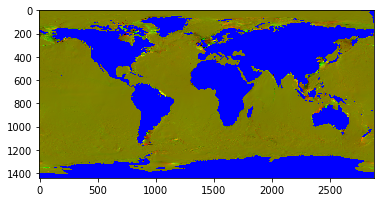

In [24]:
plt.imshow(rgb)

In [39]:
n_zooms = 4
out_dir = pathlib.Path('glossis')

height = 180
width = 360

img = Image.fromarray(rgb)

for zoom in range(0, n_zooms):
    width_at_zoom  = 2**zoom * width
    height_at_zoom = 2**zoom * height
    img_at_zoom = np.asarray(img.resize((width_at_zoom, height_at_zoom)))
    for x in range(2 ** zoom):
        x_dir = out_dir / str(zoom) / str(x)
        x_dir.mkdir(parents=True, exist_ok=True)
        for y in range(2 ** zoom):
            
            filename =  x_dir / f"{y}.png"
            s = np.s_[(y * height):((y + 1) * height), (x * width):((x + 1) * width)]
            img_xyz = img_at_zoom[s]
            plt.imsave(filename, img_xyz)


In [36]:
filename.parent.mkdir(f=True, )
